# Car Price Estimator

This is a Simple Estimator based on a Linear Regression Model which estimates/predict the price/value of the car based the given input features, Since the Data set is small, there won't be a train/test split, hence inaccuracies are highly expected.

* Note : The Data being used in this Estimator is 'Fabricated', hence will not produce real life output.

# Importing Libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# Loading Data

In [164]:
price = pd.read_csv('C:/Users/LENOVO/# Jupyter Notebook Files/Machine Learning/Resources/py/ML/5_one_hot_encoding/Exercise/carprices.csv')
price

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Data Cleaning

* #### Converting Categorical data into Numerical data

In [165]:
price['Car Model'].unique()

array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object)

In [166]:
dummies = pd.get_dummies(price['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [167]:
price = pd.concat([price,dummies],axis='columns')
price

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [168]:
price = price.drop(['Car Model','Mercedez Benz C class'],axis='columns')
price

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


* Removed the dummy trap problem <br>
* Converted the Categorical Data into Numerical Data <br>

#### No futher Discrepencies were found in the Data Set

# Data Visualization

Text(0, 0.5, 'Sell Price')

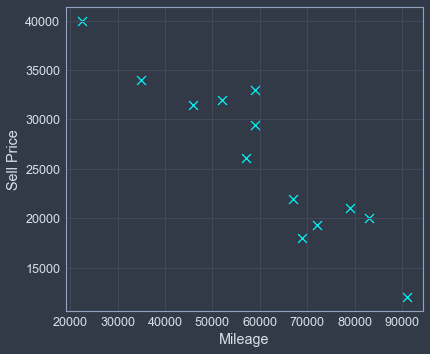

In [169]:
plt.scatter(price['Mileage'],price['Sell Price($)'],marker='x',color='cyan',s=80)
plt.xlabel('Mileage')
plt.ylabel('Sell Price')

#### A Linear Regression Model can be applied.

# Separting Dependant and Independant Variables

In [170]:
y = price.pop('Sell Price($)')
x = price

# Model Creation

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
linear_model = LinearRegression()

# Training the Model

In [173]:
linear_model.fit(x,y)

LinearRegression()

# Testing the Model

In [174]:
model = input("Which model is your car ? \n 1. Audi A5 \n 2. BMW X5 \n 3. Mercedez Benz C class \n")
mileage = int(input("What Mileage (in m) would you expect your car to produce ? : "))
age = int(input("How many years has it been since you've bought your car ? : "))
audi = ['Audi A5', '1', 'AudiA5']
audi = [x.lower() for x in audi]
bmw = ['BMW X5', '2', 'BMWX5']
bmw = [x.lower() for x in bmw]
benz = ['Mercedez Benz C class', '3', 'MercedezBenzCclass']
benz = [x.lower() for x in benz]
if model in audi:
    model_encoded = [1,0] 
    model = 'Audi A5'
elif model in bmw:
    model_encoded = [0,1]
    model = 'BMW X5'
else:
    model_encoded = [0,0]
    model = 'Mercedez Benz C class'
model = model.capitalize()
sell_price = int(linear_model.predict([[mileage,age,model_encoded[0],model_encoded[1]]]))
print("The Model estimated that your {} of {} years old which produces a Mileage of {} km could fetch a price of $ {} ".format(model,age,mileage/1000,sell_price))

Which model is your car ? 
 1. Audi A5 
 2. BMW X5 
 3. Mercedez Benz C class 
3
What Mileage (in m) would you expect your car to produce ? : 45000
How many years has it been since you've bought your car ? : 4
The Model estimated that your Mercedez benz c class of 4 years old which produces a Mileage of 45.0 km could fetch a price of $ 36991 


# Accuracy of the Model

In [175]:
score = linear_model.score(x,y)
score = int(score*100)
print("The Model has a accuracy of {} %".format(score))
# This score doesn't actually matter, because the training data is being fed into the model for testing

The Model has a accuracy of 94 %


# Visualizing the Model

The Model cannot be visualized as visualization take more than 3 Dimensions for this case and a Maximum of 3 Dimensions could be visualized.